In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.datasets import mnist
from ipywidgets import interact_manual

Using TensorFlow backend.


如何匯入上次儲存的模型及權重

In [2]:
model = model_from_json(open('handwriting_model_architecture.json').read())
model.load_weights('handwriting_model_weights.h5')

In [3]:
model.compile(loss='mse', optimizer=SGD(lr=0.1))

只匯入 x0_test 的資料，再來轉換成 x_test


In [16]:
(_,_), (x0_test, _) = mnist.load_data()

num_test = len(x0_test)
x_test = x0_test.reshape(num_test, 28*28)

In [5]:
len(x0_test)

10000

In [6]:
x0_test.all

<function ndarray.all>

In [7]:
x0_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
len(x_test)

10000

In [10]:
x_test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

使用 model 預測答案

In [12]:
result = model.predict_classes(x_test)

 9984/10000 [============================>.] - ETA: 0s 

In [13]:
def 辨識(測試編號):
    plt.imshow(x0_test[測試編號], cmap="Greys")
    print("神經網路判斷為:", result[測試編號])

神經網路判斷為: 7


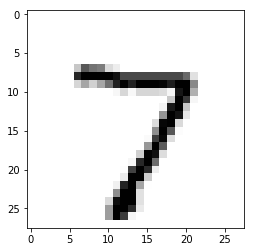

In [14]:
辨識(0)

神經網路判斷為: 7


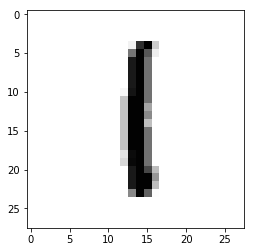

In [21]:
interact_manual(辨識, 測試編號 = (0, num_test-1));